In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utilities import pasar_a_datetime
import os 

In [2]:
# Change this path to run in your machine
home_path = 'C:/Users/54911/OneDrive/Documentos/git_repos/elecciones2023-arg'

In [3]:
os.chdir(home_path)

# Political parties

In [4]:
post_political = pd.read_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/modeling/Preparando_datos/publicaciones_politicas.csv')

Text(0.5, 1.0, 'Political posts')

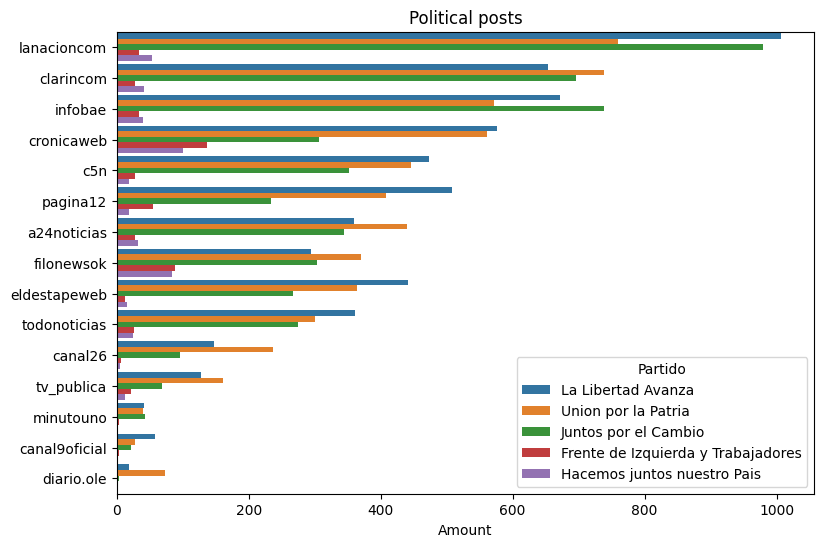

In [5]:
plt.figure(figsize=(9,6))
orden = post_political['fuente'].value_counts().index 
hue_orden = post_political['Partido'].value_counts().index 
sns.countplot(data=post_political, y = 'fuente',
              hue='Partido',
              order=orden,
              dodge=True,
              hue_order=hue_orden,
              width=0.9)
plt.ylabel('')
plt.xlabel('Amount')
plt.title('Political posts')


Text(0.5, 1.0, "Parties ' likes")

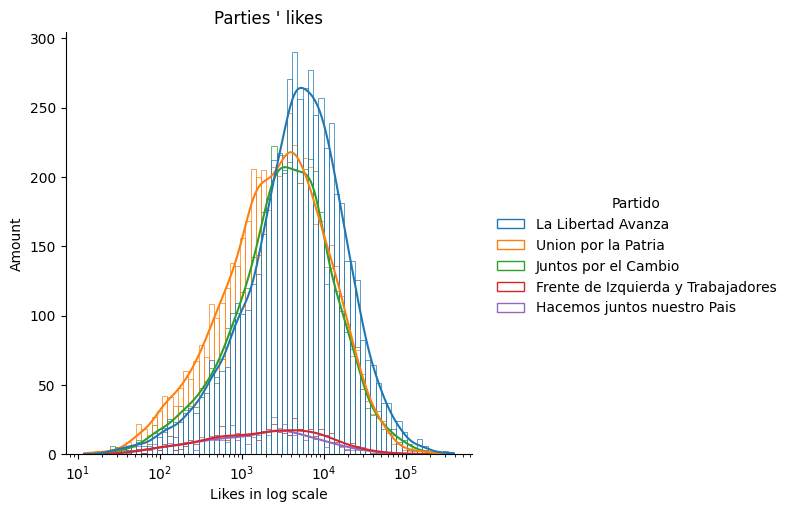

In [6]:
sns.displot(data=post_political,x='cantidad_likes',hue='Partido',
            kde=True,aspect=1, fill=False,log_scale=True)
plt.xlabel('Likes in log scale')
plt.ylabel('Amount')
plt.title('Parties \' likes')

In [7]:
post_political['fecha'] = post_political['fecha'].map(lambda x:pasar_a_datetime(x))

# Cantidad likes
Para una fuente en especifico

#REVISANDO ACTUALIZACIONES


In [8]:
df = pd.read_csv('Elecciones + IA/data_base/data_base_csv/Fuentes.csv')

In [9]:
df.sort_values(by='cant_publicaciones',inplace=True)

Text(0.5, 0, '')

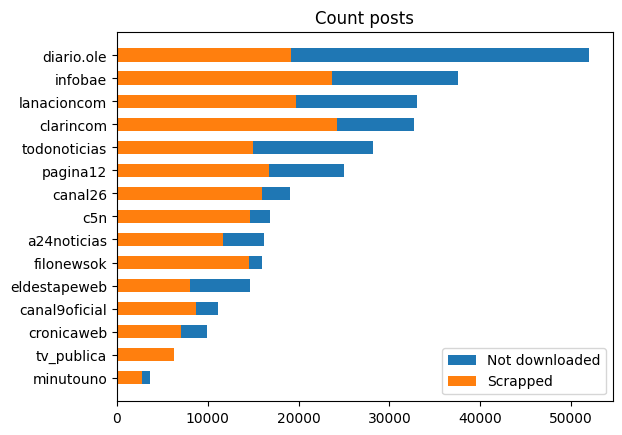

In [10]:
fuentes = df['nombre'].unique()
cant_publicaciones = {
    "Not downloaded": df['cant_publicaciones'].to_numpy(),
    "Scrapped": df['cant_recopilado'].to_numpy(),
}
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(15)

for boolean, pub in cant_publicaciones.items():
    p = ax.barh(fuentes, pub, width, label=boolean)
    bottom += pub

ax.set_title("Count posts")
ax.legend(loc="lower right")
ax.set_xlabel('')

In [15]:
post_political.head()

,cantidad_likes,fecha,fuente,Partido
0,1061,2022-06-03,a24noticias,La Libertad Avanza
1,1520,2022-05-30,a24noticias,La Libertad Avanza
2,505,2023-08-29,a24noticias,La Libertad Avanza
3,509,2023-08-28,a24noticias,La Libertad Avanza
4,2531,2023-08-21,a24noticias,La Libertad Avanza


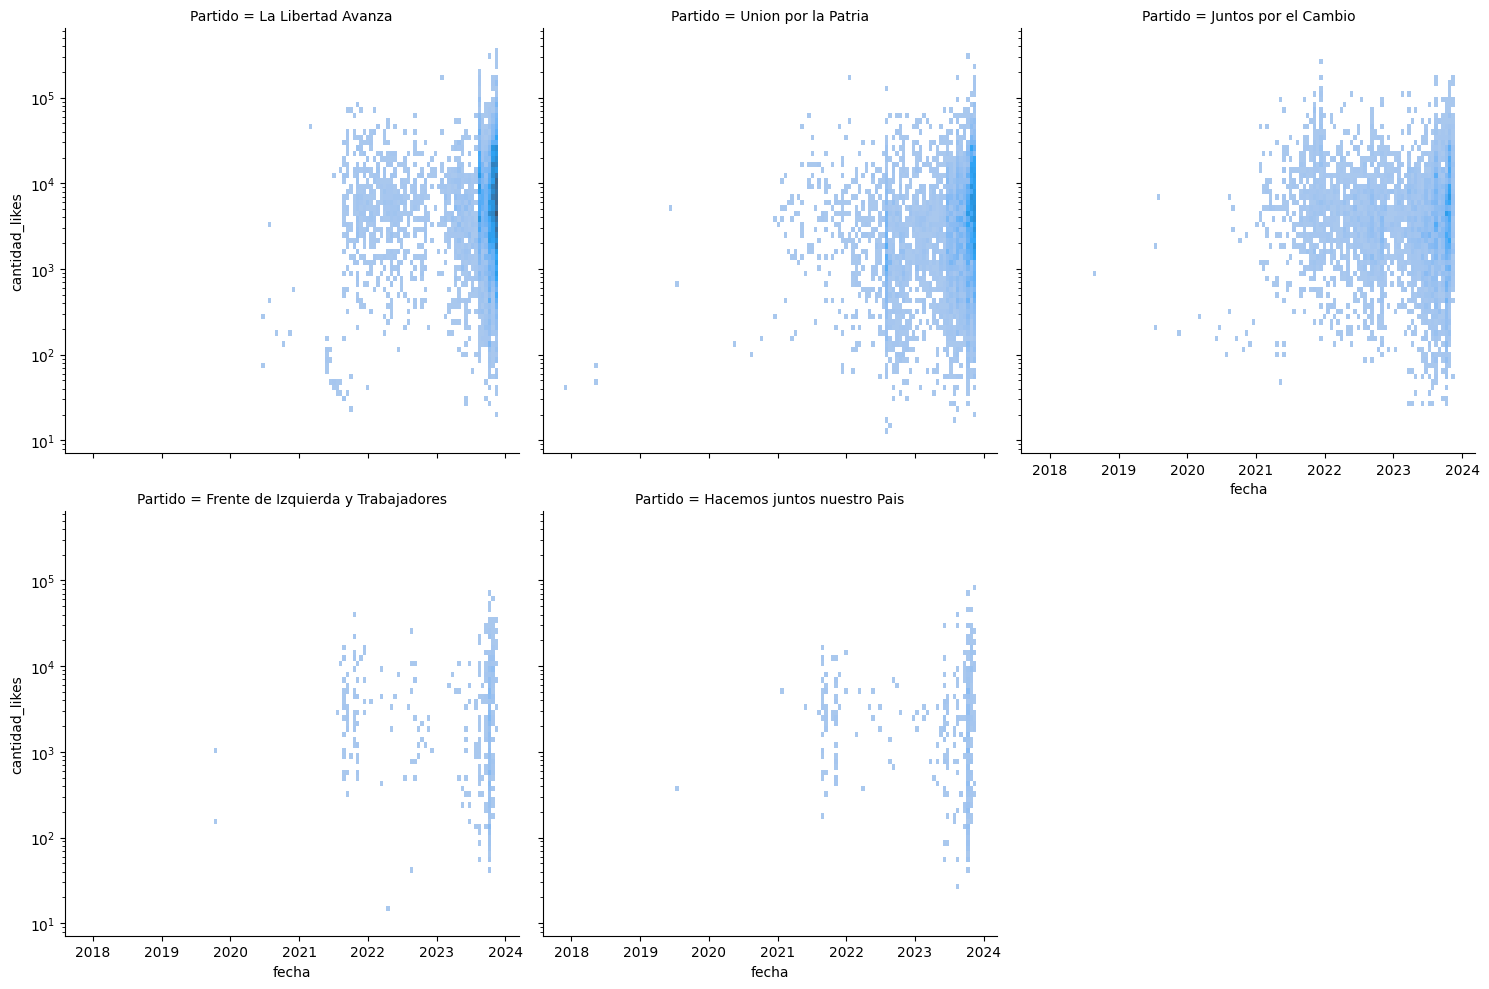

In [19]:
sns.displot(data= post_political,x='fecha',y='cantidad_likes',col='Partido',log_scale=(False,True),col_wrap=3)

In [40]:
import datetime

In [55]:
month = 12
post_political_filt = post_political[(post_political['fecha']>datetime.datetime(2023,month-1,1)) & (post_political['fecha']< datetime.datetime(2023,month,1))]

<Axes: xlabel='Count', ylabel='cantidad_likes'>

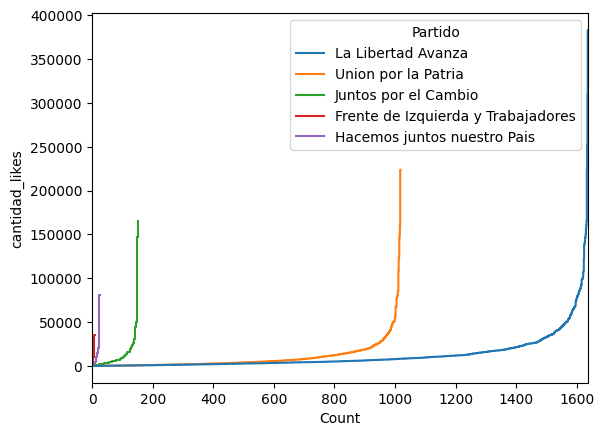

In [56]:
sns.ecdfplot(data=post_political_filt, y="cantidad_likes", hue="Partido",stat='count')

In [48]:
post_political_filt.groupby('Partido')['cantidad_likes'].sum()

Partido
Frente de Izquierda y Trabajadores       4804
Hacemos juntos nuestro Pais               472
Juntos por el Cambio                   853480
La Libertad Avanza                    1028214
Union por la Patria                    523614
Name: cantidad_likes, dtype: int64

In [29]:
cantidad_post_pol = post_political[['Partido','fecha']].value_counts().reset_index().rename(columns=dict(zip(['Partido','fecha',0],['Partido','fecha','Cantidad'])))

<Axes: xlabel='Count', ylabel='Cantidad'>

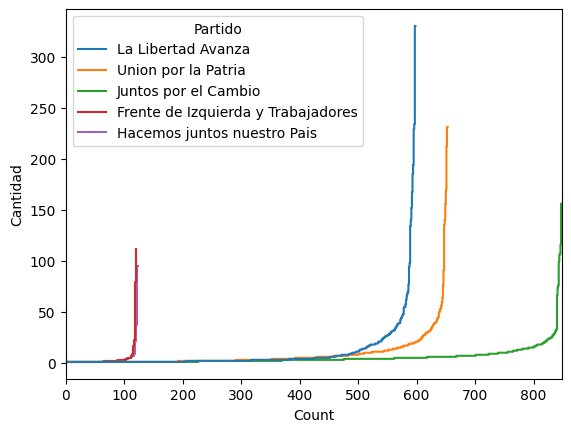

In [33]:
sns.ecdfplot(data=cantidad_post_pol, y="Cantidad", hue="Partido",stat='count')

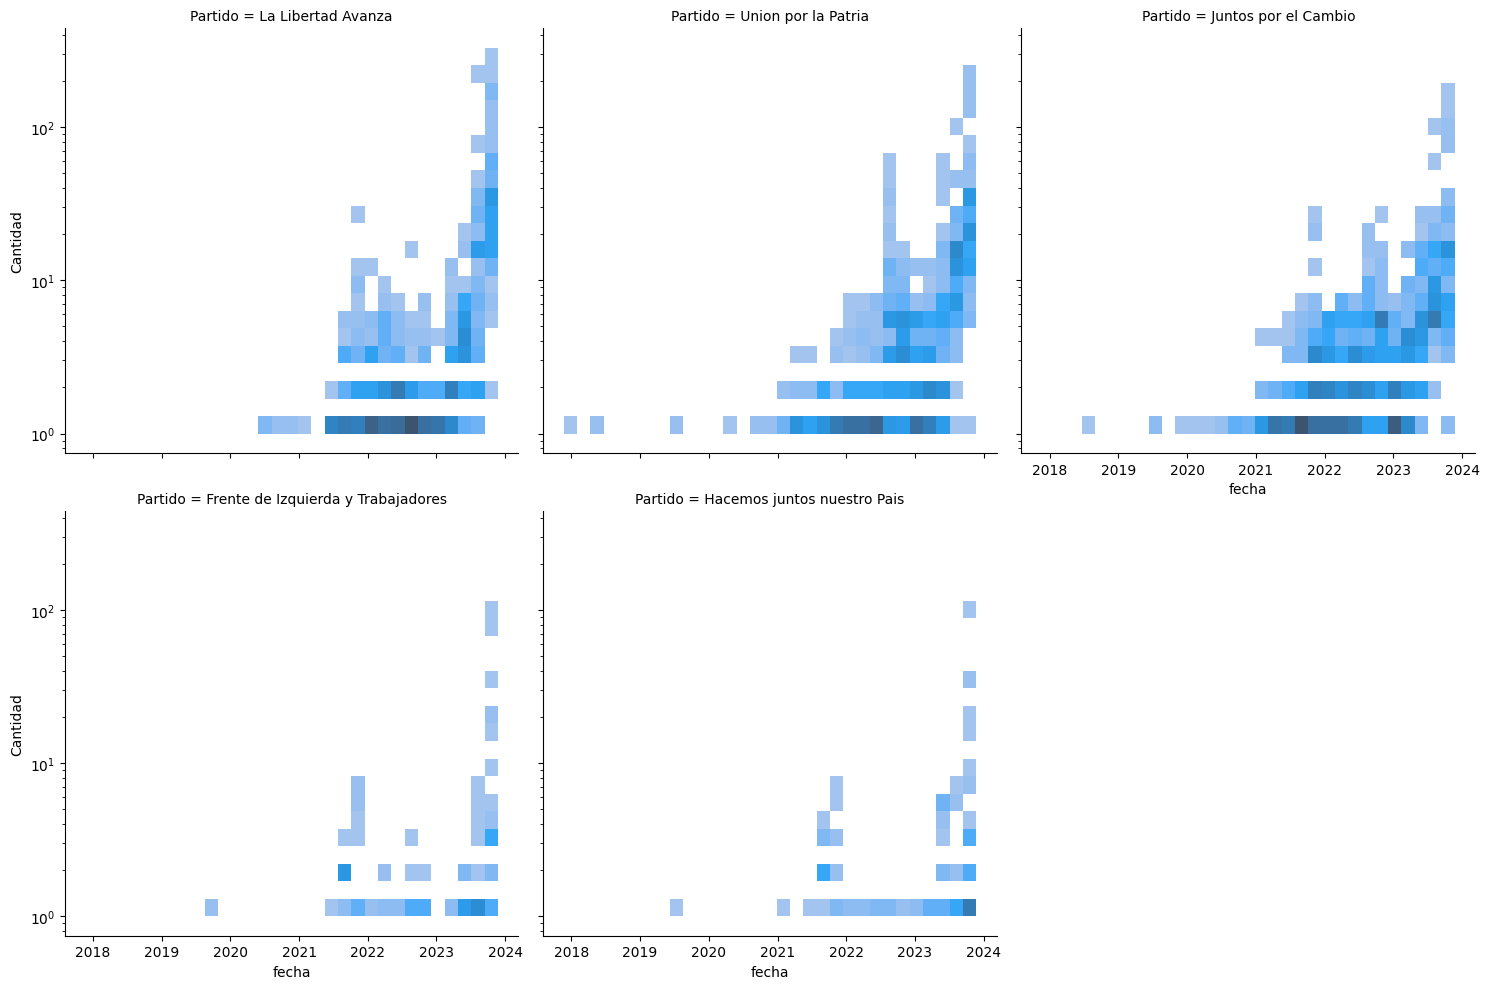

In [35]:
sns.displot(data= cantidad_post_pol,x='fecha',y='Cantidad',col='Partido',
            log_scale=(False,True),
            col_wrap=3)